In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Step 1: Import Dependencies

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv('/Users/AZM/Desktop/Dataset/rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
animes = pd.read_csv('/Users/AZM/Desktop/Dataset/anime.csv')
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Step 3: Exploratory Data Analysis

In [5]:
n_ratings = len(ratings)
n_animes = ratings['anime_id'].nunique()
n_users = ratings['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique anime_id's: {n_animes}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per anime: {round(n_ratings/n_animes, 2)}")

Number of ratings: 7813737
Number of unique anime_id's: 11200
Number of unique users: 73515
Average number of ratings per user: 106.29
Average number of ratings per anime: 697.66


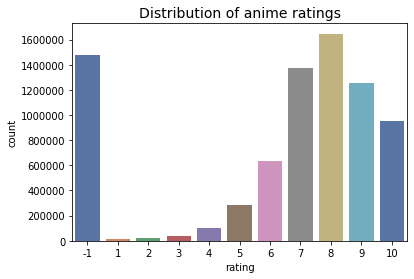

In [6]:
sns.countplot(x="rating", data=ratings, palette="deep")
plt.title("Distribution of anime ratings", fontsize=14)
plt.show()

Now I want to replace "-1" rating to 0, so that it doesn't impact our mean anymore

In [7]:
ratings.loc[ratings['rating'] == -1, 'rating'] = 0
ratings.head()

,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0


In [8]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

mean_ratings = ratings.groupby('user_id')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 6.33.
Mean rating per user: 6.82.


In [9]:
#Which movie has the lowest and highest average rating?

mean_ratings = ratings.groupby('anime_id')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
animes[animes['anime_id'] == lowest_rated]

,anime_id,name,genre,type,episodes,rating,members
4980,1396,Future GPX Cyber Formula: Early Days Renewal,"Drama, Sci-Fi, Shounen, Sports",OVA,2,6.58,338


In [10]:
highest_rated = mean_ratings['rating'].idxmax()
animes[animes['anime_id'] == highest_rated]

,anime_id,name,genre,type,episodes,rating,members
8364,31211,Choegang Top Plate,"Action, Comedy, Kids, Sports",TV,26,7.2,86


In [11]:
#Choegang Top Plate may be the "highest" rated movie, 
#but it only has 86 ratings comparing to others that have thousands of them. 
#A better approach for evaluating movie popularity is to do look at the Bayesian average.

anime_stats = ratings.groupby('anime_id')[['rating']].agg(['count', 'mean'])
anime_stats.columns = anime_stats.columns.droplevel()

In [12]:

C = anime_stats['count'].mean()
m = anime_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('anime_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['anime_id', 'bayesian_avg']
anime_stats = anime_stats.merge(bayesian_avg_ratings, on='anime_id')

In [13]:
anime_stats = anime_stats.merge(animes[['anime_id', 'name']])
anime_stats.sort_values('bayesian_avg', ascending=False).head()

,anime_id,count,mean,bayesian_avg,name
5673,9253,19283,8.237359,8.100195,Steins;Gate
3965,5114,24574,8.154269,8.048116,Fullmetal Alchemist: Brotherhood
3531,4181,17854,7.966114,7.828585,Clannad: After Story
2651,2904,24242,7.894563,7.794262,Code Geass: Hangyaku no Lelouch R2
6466,11061,8575,8.052128,7.770505,Hunter x Hunter (2011)


In [14]:
anime_stats.sort_values('bayesian_avg', ascending=True).head()

,anime_id,count,mean,bayesian_avg,name
385,413,1131,2.236958,3.027477,Hametsu no Mars
8044,19315,2677,3.363840,3.559241,Pupa
2929,3287,237,1.839662,3.682868,Tenkuu Danzai Skelter+Heaven
7469,16608,231,2.670996,3.901568,Shitcom
3856,4866,1397,3.778096,3.954928,Pico x CoCo x Chico


In [16]:
#A Glimpse at Movie Genres

animes['genre']=animes['genre'].fillna("")
animes['genre'] = [''.join(map(str, l)) for l in animes['genre']]
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [17]:
animes['genre'] = animes['genre'].apply(lambda x: x.split(","))
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.16,151266


In [18]:
from collections import Counter

genre_frequency = Counter(g for genres in animes['genre'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 83 genres.


Counter({'Drama': 991,
         ' Romance': 1371,
         ' School': 1170,
         ' Supernatural': 1023,
         'Action': 2845,
         ' Adventure': 891,
         ' Drama': 1025,
         ' Fantasy': 1815,
         ' Magic': 716,
         ' Military': 405,
         ' Shounen': 1663,
         ' Comedy': 1452,
         ' Historical': 636,
         ' Parody': 393,
         ' Samurai': 146,
         ' Sci-Fi': 1986,
         'Sci-Fi': 84,
         ' Thriller': 86,
         'Comedy': 3193,
         ' Sports': 499,
         ' Super Power': 464,
         ' Space': 380,
         ' Slice of Life': 1117,
         ' Mecha': 826,
         'Adventure': 1457,
         ' Music': 457,
         ' Mystery': 421,
         ' Seinen': 536,
         'Fantasy': 494,
         ' Martial Arts': 260,
         ' Vampire': 101,
         ' Shoujo': 590,
         ' Horror': 295,
         ' Police': 196,
         ' Psychological': 206,
         'Mystery': 74,
         'Psychological': 23,
         ' Demons': 2

In [19]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Comedy', 3193), ('Action', 2845), (' Sci-Fi', 1986), (' Fantasy', 1815), (' Shounen', 1663)]


Step 4: Data Pre-processing


The create_X() function outputs a sparse matrix X with four mapper dictionaries:

user_mapper: maps user id to user index

movie_mapper: maps movie id to movie index

user_inv_mapper: maps user index to user id

movie_inv_mapper: maps movie index to movie id

We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/movie id.

In [20]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (user_id, anime_id, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        anime_mapper: dict that maps anime id's to anime indices
        anime_inv_mapper: dict that maps movie indices to anime id's
    """
    M = df['user_id'].nunique()
    N = df['anime_id'].nunique()

    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(M))))
    anime_mapper = dict(zip(np.unique(df["anime_id"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    anime_inv_mapper = dict(zip(list(range(N)), np.unique(df["anime_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [anime_mapper[i] for i in df['anime_id']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, anime_mapper, user_inv_mapper, anime_inv_mapper

X, user_mapper, anime_mapper, user_inv_mapper, anime_inv_mapper = create_X(ratings)

In [21]:
#Evaluating sparsity
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.95%


In [22]:
n_ratings_per_user = X.getnnz(axis=1)

print(f"Most active user rated {n_ratings_per_user.max()} animes.")
print(f"Least active user rated {n_ratings_per_user.min()} animes.")

Most active user rated 10227 animes.
Least active user rated 1 animes.


In [23]:
n_ratings_per_anime = X.getnnz(axis=0)

print(f"Most rated anime has {n_ratings_per_anime.max()} ratings.")
print(f"Least rated anime has {n_ratings_per_anime.min()} ratings.")

Most rated anime has 39340 ratings.
Least rated anime has 1 ratings.


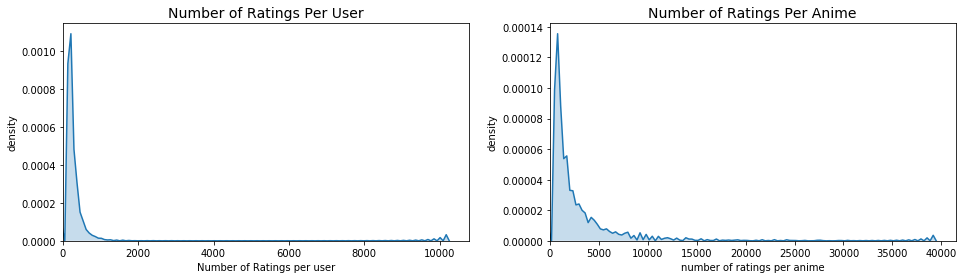

In [24]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("Number of Ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_anime, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Anime", fontsize=14)
plt.xlabel("number of ratings per anime")
plt.ylabel("density")
plt.show()

In [25]:
#Normalizing our data
# normalize the data attributes
from sklearn import preprocessing

X_norm = preprocessing.normalize(X)

Step 5: Item-item Recommendations with k-Nearest Neighbors

In [26]:
from sklearn.neighbors import NearestNeighbors

def find_similar_animes(anime_id, X, anime_mapper, anime_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given anime id.
    
    Args:
        animee_id: id of the anime of interest
        X: user-item utility matrix
        k: number of similar animes to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar anime ID's
    """
    X = X.T
    neighbour_ids = []
    
    anime_ind = anime_mapper[anime_id]
    anime_vec = X[anime_ind]
    if isinstance(anime_vec, (np.ndarray)):
        anime_vec = anime_vec.reshape(1,-1)
    # use k+1 since kNN output includes the anime_id of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(anime_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(anime_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [27]:
similar_animes = find_similar_animes(1, X_norm, anime_mapper, anime_inv_mapper, k=10)
similar_animes

[5, 205, 6, 227, 30, 47, 43, 2001, 467]

In [28]:
anime_titles = dict(zip(animes['anime_id'], animes['name']))

anime_id = 20

similar_animes = find_similar_animes(anime_id, X_norm, anime_mapper, anime_inv_mapper, metric='cosine', k=10)
anime_title = anime_titles[anime_id]

print(f"Because you watched {anime_title}:")
for i in similar_animes:
    print(anime_titles[i])

Because you watched Naruto:
Death Note
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!
Fullmetal Alchemist
Dragon Ball Z
Bleach
Naruto: Shippuuden Movie 1
Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!
Dragon Ball
Code Geass: Hangyaku no Lelouch


Step 6: Handling the cold-start problem

In [29]:
n_animes = animes['anime_id'].nunique()
print(f"There are {n_animes} unique animes in our animes dataset.")

There are 12294 unique animes in our animes dataset.


In [30]:
genres = set(g for G in animes['genre'] for g in G)

for g in genres:
    animes[g] = animes.genre.transform(lambda x: int(g in x))
    
anime_genres = animes.drop(columns=['anime_id', 'name','genre'])


In [31]:
del anime_genres['type']
del anime_genres['episodes']
del anime_genres['rating']
del anime_genres['members']
del anime_genres['']

In [32]:
anime_genres.head()

,Hentai,Police,Samurai,Ecchi,Sports,Parody,Demons,Cars,Music,Slice of Life,...,Comedy,Sports,Sci-Fi,Josei,Parody,Horror,Slice of Life,Yaoi,Kids,Romance
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(anime_genres, anime_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (12294, 12294)


In [34]:
def anime_finder(title):
    return animes[animes['name'].str.contains(title)]['name'].tolist()

anime_finder('Naruto')

['Boruto: Naruto the Movie',
 'Naruto: Shippuuden',
 'The Last: Naruto the Movie',
 'Naruto: Shippuuden Movie 6 - Road to Ninja',
 'Naruto',
 'Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi',
 'Naruto: Shippuuden Movie 5 - Blood Prison',
 'Naruto x UT',
 'Naruto: Shippuuden Movie 4 - The Lost Tower',
 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono',
 'Naruto: Shippuuden Movie 1',
 'Naruto: Shippuuden Movie 2 - Kizuna',
 'Naruto Shippuuden: Shippuu! &quot;Konoha Gakuen&quot; Den',
 'Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!!',
 'Naruto SD: Rock Lee no Seishun Full-Power Ninden',
 'Naruto Shippuuden: Sunny Side Battle',
 'Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!',
 'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!',
 'Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo!',
 'Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! Special: Konoha Annual Sports Festival',
 'Naruto Movie 3: D

In [35]:
anime_idx = dict(zip(animes['name'], list(animes.index)))
title = anime_finder('Sailor Moon')[0]
n_recommendations = 10

idx = anime_idx[title]
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_animes = [i[0] for i in sim_scores]

print(f"Recommendations for {title}:")
animes['name'].iloc[similar_animes]

Recommendations for Bishoujo Senshi Sailor Moon: Sailor Stars:


925      Bishoujo Senshi Sailor Moon S: Kaguya Hime no ...
1961     Bishoujo Senshi Sailor Moon: Sailor Stars - He...
322                                      Cardcaptor Sakura
1470                                 Magic Knight Rayearth
3298     Koisuru Tenshi Angelique: Kokoro no Mezameru Toki
5461                           Magic Knight Rayearth Omake
239                                     Majo no Takkyuubin
1617                                       Akazukin Chacha
2294                                        Hatenkou Yuugi
10950                    Cardcaptor Sakura: Clear Card-hen
Name: name, dtype: object